In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans

# Introduction

In [338]:
germann = pd.read_csv('german_credit_data.csv')
germann.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [339]:
german = german.rename(columns={'Unnamed: 0': 'ID'})
german.head()

,ID,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [340]:
german.shape

(1000, 10)

There was a Dataset about German Credit Company. In the dataset, there was 1000 record and 10 features about the costumer that include 
- ID, 
- Age, 
- Sex, 
- Job, 
- Housing Status, 
- Saving Acounts category, 
- Checking Accounts category, 
- Credit Amount, 
- Duration of Credit and 
- Purpose of Credit. <br>
<br>

The Company need a model that can make this Data help them to know if there was a new customer want to make a credit is a capable costumer or not. <br>
<br>

In this case, a German Credit Company Data Scientist will make a cluster to identify which is customer than capable to make a credit or not. It also can be used for making a customer segmentation that can impact to marketing that can also make customer being satisfied.

#### Missing Values

In [341]:
german.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
ID                    0
dtype: int64

There was a missing values on checking account and saving account feature, so we need to drop them to make a clean data.

In [342]:
datanew=german.drop(columns=['Checking account', 'Saving accounts'])
datanew.head()

,ID,Age,Sex,Job,Housing,Credit amount,Duration,Purpose
0,0,67,male,2,own,1169,6,radio/TV
1,1,22,female,2,own,5951,48,radio/TV
2,2,49,male,1,own,2096,12,education
3,3,45,male,2,free,7882,42,furniture/equipment
4,4,53,male,2,free,4870,24,car


## Data Information

In [343]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
ID               1000 non-null int64
Age              1000 non-null int64
Sex              1000 non-null object
Job              1000 non-null int64
Housing          1000 non-null object
Credit amount    1000 non-null int64
Duration         1000 non-null int64
Purpose          1000 non-null object
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


There was two data types in this Dataset. <br>
We want to devide in to numerical dataset for integer type, and categorical dataset for object type.

**Numerical** Data Type Consist Of:

- ID
- Age
- Job
- Credit Amount
- Duration

**Categorical** data type consist of :
- Sex
- Housing
- Purpose




### Numerical Data

In [344]:
numerical=data[['ID', 'Age', 'Job', 'Credit amount', 'Duration']]
numerical.head()

,ID,Age,Job,Credit amount,Duration
0,0,67,2,1169,6
1,1,22,2,5951,48
2,2,49,1,2096,12
3,3,45,2,7882,42
4,4,53,2,4870,24


### Categorical Data

In [345]:
categorical=data[['Sex', 'Housing', 'Purpose']]
categorical.head()

,Sex,Housing,Purpose
0,male,own,radio/TV
1,female,own,radio/TV
2,male,own,education
3,male,free,furniture/equipment
4,male,free,car


In Clustering method, we need to make the categorical data to be numerical data. Because it just cant process the data with numerical types. So we nee to **encode** the categorical data to numerical types.

#### Encoding Data

In [0]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [347]:
# apply le on categorical feature columns
categoric = categorical.apply(lambda col: le.fit_transform(col))
categoric.head()

,Sex,Housing,Purpose
0,1,1,5
1,0,1,5
2,1,1,3
3,1,0,4
4,1,0,1


#### Sex

In [348]:
Sex= categorical.Sex.value_counts()
Sex

male      690
female    310
Name: Sex, dtype: int64

In [349]:
Sex= categoric.Sex.value_counts()
Sex

1    690
0    310
Name: Sex, dtype: int64

**Notes**
- 1 = **male** with **690** amount of costumer
- 0 = **female** with **310** amount of costumer

#### Housing

In [350]:
Housing= categoric.Housing.value_counts()
Housing

1    713
2    179
0    108
Name: Housing, dtype: int64

In [351]:
Housing= categorical.Housing.value_counts()
Housing

own     713
rent    179
free    108
Name: Housing, dtype: int64

**Notes**

- 1 = **Own** Housing with **713** amount of Costumer
- 2 = **Rent** Housing with **179** amount of Costumer
- 3 = **Free** Housing with **108** amount of Costumer

#### Purpose

In [352]:
Purpose= categorical.Purpose.value_counts()
Purpose

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

In [353]:
Purpose= categoric.Purpose.value_counts()
Purpose

1    337
5    280
4    181
0     97
3     59
6     22
7     12
2     12
Name: Purpose, dtype: int64

**Notes**

- 0 = **Business** purpose with **97** amount of costumer
- 1 = **Car** purpose with **337** amount of costumer
- 2 = **Domestic appliances** purpose with **12** amount of costumer
- 3 = **Education** purpose with **59** amount of costumer
- 4 = **Furniture/equipment** purpose with **181** amount of costumer
- 5 = **Radio/TV** purpose with **280** amount of costumer
- 6 = **Repairs** purpose with **22** amount of costumer
- 7 = **Vacation/others** purpose with **12** amount of costumer

### Merging Data

After divide the data to numerical and categoricald, we need to merge it to be one dataset with all numerical dataset. So we can process them for Clustering

In [354]:
dataset =  pd.concat(objs=[numerical, categoric], axis=1).reset_index(drop=True)
dataset.head()

,ID,Age,Job,Credit amount,Duration,Sex,Housing,Purpose
0,0,67,2,1169,6,1,1,5
1,1,22,2,5951,48,0,1,5
2,2,49,1,2096,12,1,1,3
3,3,45,2,7882,42,1,0,4
4,4,53,2,4870,24,1,0,1


## Normalizing Data

After making a numerical for all record, we need to make them as array, so they can be process in Clustering Methods.

In [355]:
X = np.asarray(dataset)
X

array([[  0,  67,   2, ...,   1,   1,   5],
       [  1,  22,   2, ...,   0,   1,   5],
       [  2,  49,   1, ...,   1,   1,   3],
       ...,
       [997,  38,   2, ...,   1,   1,   5],
       [998,  23,   2, ...,   1,   0,   5],
       [999,  27,   2, ...,   1,   1,   1]])

 # K-Means Algorithm
 
 The first algorithm that we want to used for this Clustering Method using German Credit Company Dataset is K-Means Algorithm. 

## Finding K

The first step in K-Means is finding the best K, so we can get the best result of Clustering. There was two way that we used in this model. This metjod is used to know the best K for K-Means Clustering,It was Scree Plot and Silhouette Plot.

### Scree Plot

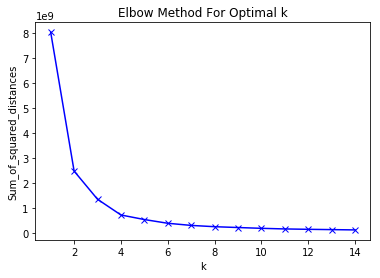

In [356]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on Scree Plot, we can see that the line is start not extremely decrease is on 3 k. So we can conclude that the best k for this dataset is k=3.

### Silhouette Plot

In [357]:
range_n_clusters = [3, 4, 5, 6]
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = n_cluster, max_iter =1000)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(X, labels)
    print(silhouette_avg)

0.6243124836508543
0.5627389246541363
0.5203030713143146
0.4880601086430446


Based on Silhouette Plot, we can see that the highest values of silhouette is on n_cluster = 3 with 0.6243124836508543 amount. So we can conclude that 3 is the best k for this k-means clustering

In [358]:
from sklearn.preprocessing import StandardScaler
X = dataset.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 2.76645648,  0.14694918, -0.74513141, ...,  0.67028006,
        -0.13371046,  1.07326286],
       [-1.19140394,  0.14694918,  0.94981679, ..., -1.49191369,
        -0.13371046,  1.07326286],
       [ 1.18331231, -1.38377145, -0.41656241, ...,  0.67028006,
        -0.13371046,  0.06170503],
       ...,
       [ 0.21583532,  0.14694918, -0.87450324, ...,  0.67028006,
        -0.13371046,  1.07326286],
       [-1.10345149,  0.14694918, -0.50552769, ...,  0.67028006,
        -2.01695631,  1.07326286],
       [-0.75164167,  0.14694918,  0.46245715, ...,  0.67028006,
        -0.13371046, -0.9498528 ]])

## Clustering Model

Based on Scree Plot and Silhouette Plot, we will choose 3 for the number of cluster

In [359]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 0 1 0 0 2 1 0 1 0 1 0 1 1 1 1 1 0 2 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0
 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 2 1 0 1 1 1 2 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 2 0 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 2 0 0 0 1 1
 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 2 1 0 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 2 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 2 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 2 0 1 1 0 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 2 1 1 1 2 1 2 1 1 1 0 1 1 1 1 1 0 2 0 0 1 1 1 2 0 0 0 2
 0 1 1 1 1 1 1 1 2 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0
 2 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 2 2 0 1 1 2 1 1 2 1 1 0 1 1 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 2 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 

After find the cluster for every row, we want to add the new feature of Cluster based on K-Means.

In [360]:
dataset["ClusterKMeans"] = labels
dataset.head()

,ID,Age,Job,Credit amount,Duration,Sex,Housing,Purpose,ClusterKMeans
0,0,67,2,1169,6,1,1,5,1
1,1,22,2,5951,48,0,1,5,0
2,2,49,1,2096,12,1,1,3,1
3,3,45,2,7882,42,1,0,4,0
4,4,53,2,4870,24,1,0,1,0


In [361]:
K= dataset.ClusterKMeans.value_counts()
K

1    728
0    216
2     56
Name: ClusterKMeans, dtype: int64

We know that cluster 0 has the highest amount of than the another cluster. Now Lets see what makes cluster 0 is the highest Cluster than the other by clustering visualization looking from the features of Dataset.

## Clustering Correlation

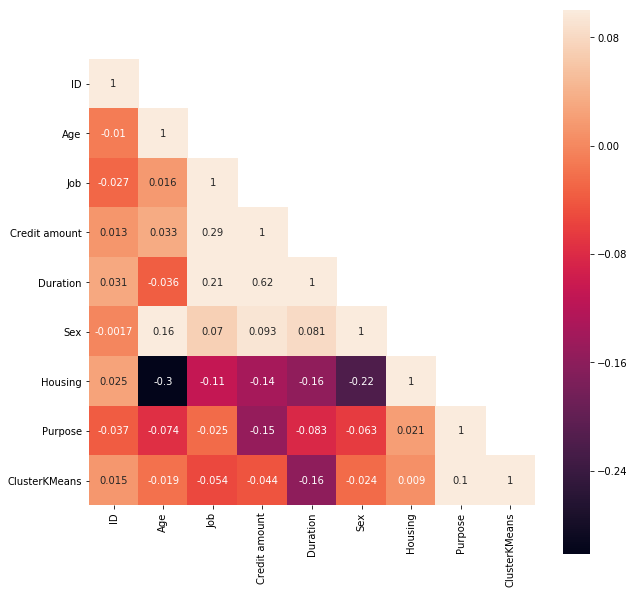

In [362]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
#create correlation with hitmap

#create correlation
corr = dataset.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (5,3))
fig.set_size_inches(10,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.1, 
            square = True, 
            annot = True)

Based on the correlation that being processed by pearson method. <br>
<br>The **Correlation between Cluster K-Means and Other Feature** is like the explanation.


1.   Cluster - Credit Amount = 0.91. This is the high correlation of Cluster with feature. It means that the Credit amount of costumer have the highest affect to Clustering.
2.   Cluster - Duration = 0.59
3. Cluster -Job = 0.24
4. Cluster - Sex = 0.093
5. Cluster - Age = 0.03
6. Cluster - Purpose = -0.17
7. Cluster - Housing = -0.15
8. Cluster - ID = -0.0091

**Notes** <br>
The (+) number correlation means that the **highest the feature** will be include in the **highest cluster** <br>
The (-) number correlation means that **the lowers the feature** will be include in the **highest cluster.** <br>

<br>

We can see that **ID, Housing and Purpose** feature didnt have a big affect to define a cluster because they have a low correlation with Cluster KMeans. And **Duration, Job, Sex, and Age** have a medium correlation with Cluster K-Means



## Clustering Visualization

Based on Pearson Correlation Method, we can see that Credit Amount have the highest value correlation with Cluster K-Means. So, in this visualization, we want to know how the correlation of Credit Score with other values that can define that record to the type of cluster.

### Credit Amount and Duration

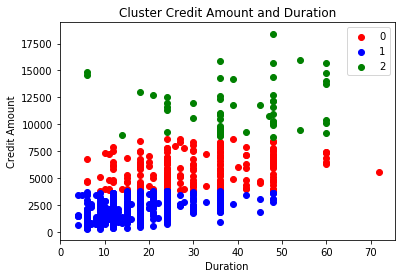

In [363]:
x = X[:,3]
x1 = X[:,2]
group= labels
color = ['red','blue','green']
fig, ax = plt.subplots()
for g in set(labels):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb, c=color[g], label=g)
ax.legend()
plt.xlabel("Duration")
plt.ylabel("Credit Amount")
plt.title("Cluster Credit Amount and Duration")
plt.show()

Credit Amount and Duration have 0.62 correlation which is the highest correlation of Credit Amount with other values. <br>
<br>
Based on the graph, we can see that 
- **Cluster 0** is the Costumer that have a **low credit amount** and also have the **short duration** which is means that they have a **low or good risk** because they can giving back the credit fastly.
- **Cluster 1** is the Costumer that have a **average credit amount** and also have the **short duration** which is means that they have a **medium risk** because they can giving back the credit fastly but not as fast like Cluster 0.
- **Cluster 2** is the Costumer that have a **high credit amount** and also have the **long duration** which is means that they have a **high risk** because they can giving back the credit slowly.

### Credit Amount and Sex

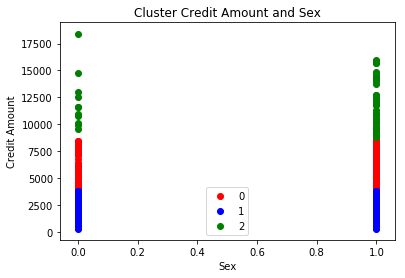

In [364]:
x = X[:,4]
x1 = X[:,2]
group= labels
color = ['red','blue','green']
fig, ax = plt.subplots()
for g in set(labels):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb, c=color[g], label=g)
ax.legend()
plt.xlabel("Sex")
plt.ylabel("Credit Amount")
plt.title("Cluster Credit Amount and Sex")
plt.show()

Based on the correlation of Credit Amount and Gender of Customer that have 0.093 value on pearson correlation, we can see that in the **female and male there was the same amount of Credit in cluster 0 and 1**. <br>

but **female have the higher amount of cluster than female in cluster 2** when we were looking by the highest amount of Credit which the density of male is more crowded than female in cluster 1.

### Credit Amount and Age

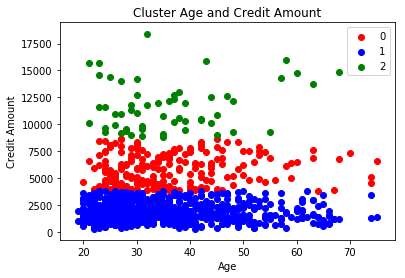

In [365]:
x = X[:,0]
x1 = X[:,2]
group= labels
color = ['red','blue','green']
fig, ax = plt.subplots()
for g in set(labels):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb, c=color[g], label=g)
ax.legend()
plt.xlabel("Age")
plt.ylabel("Credit Amount")
plt.title("Cluster Age and Credit Amount")
plt.show()

Based on the correlation of Credit Amount and Gender of Customer that have 0.033 value on pearson correlation, we can see that **cluster 0 have the highest amount** because the density of the cluster is too crowded than other cluster. But on the age distribution, all cluster is not far away from one cluster to another cluster. But in the age of more than 70 is categorized as cluster 0 and cluster 2 with low and medium credit amount.

### Credit Amount and Housing

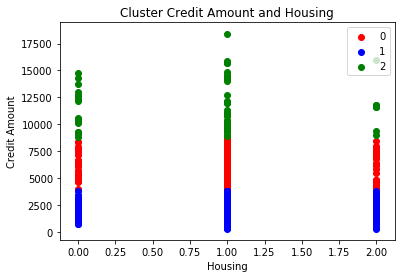

In [366]:
x = X[:,5]
x1 = X[:,2]
group= labels
color = ['red','blue','green']
fig, ax = plt.subplots()
for g in set(labels):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb, c=color[g], label=g)
ax.legend()
plt.xlabel("Housing")
plt.ylabel("Credit Amount")
plt.title("Cluster Credit Amount and Housing")
plt.show()

Based on the correlation of Credit Amount and Housing Status of Customer that have -0.14 value on pearson correlation, we can see that in the **female and male there was the same amount of Credit in cluster 0 and 1**. <br>

but **own housing status have the higher amount of cluster than rent and free housing type in cluster 2** when we were looking by the highest amount of Credit which the density of own housing status is more crowded than rent and free housing type in cluster 2

### Credit Amount and Purpose

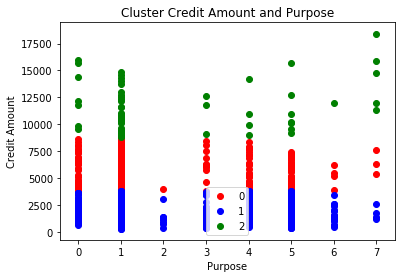

In [367]:
x = X[:,6]
x1 = X[:,2]
group= labels
color = ['red','blue','green']
fig, ax = plt.subplots()
for g in set(labels):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb, c=color[g], label=g)
ax.legend()
plt.xlabel("Purpose")
plt.ylabel("Credit Amount")
plt.title("Cluster Credit Amount and Purpose")
plt.show()

Based on the graph, we can see that **in the cluster 0 and Cluster 1, Domestic Appliance, Repairs and Vacation purpose is the lowest amount of Credit**.

While in the cluster 2, **domestic appliance purpose have the higher amount than other purpose based on Highest Credit Amount.**



## Amount of Cluster

In [368]:
Cluster= dataset.ClusterKMeans.value_counts()
Cluster

1    728
0    216
2     56
Name: ClusterKMeans, dtype: int64

**Cluster 0 as lower Risk** has the highest value which there was 728 costumer that include
- **Credit Amount** : Low (0-4000)
- **Duration Credit** : between 0-50
- **Age** : between 0-70 but not too much in age betweet 0-50.
- **Credit Purpose** : Business, Car, Furniture Equipment.
- Have the Same Proportion on **Housing Type and Gender**
<br>
<br>

**Cluster 1 as medium Risk** has the medium value which there was 216 costumer that include :
- **Credit Amount** : Medium (4000-8500)
- **Duration Credit** : between 0-50, but sometimes can more than 70
- **Age** : between 0-70 but too much in age between 0-50.
- **Purpose**: Business, Car, Furniture Equipment.
- Have the Same Proportion on **Housing Type and Gender**
<br>
<br>

**Cluster 2 as High Risk** has the lowest value which there was only 56 costumer that include :
- **Credit Amount** : High (More than 8500)
- **Duration Credit** : between 0-60, too much is 37, 49, 60.
- **Age** : between 0-50 but sometimes more than age between 0-50.
- **Purpose**: Car.
- **Housing Type**: Own Housing
- **Gender** : Female


## Clustering Analysis

Give **a possible Credit** for Customer who have a low risk and medium risk with the criteria :
- **Credit Amount** in 0-8500
- **Duration Credit** in 0-70
- **Age** between 0-50
- **Credit** Purpose for Business, Car, and Furniture Equipment
- **Gender and Housing Type** it doesnt matter.

**Minimize The Credit** For Costumer who have a high risk with criteria :
- **Credit Amount** : More than 8500
- **Duration Credit** : age in 37, 49, 60.
- **Age** : between 50-70 
- **Purpose**: Car.
- **Housing Type**: Own Housing
- **Gender** : Female


# Hierarchical Clustering

## Dendogram

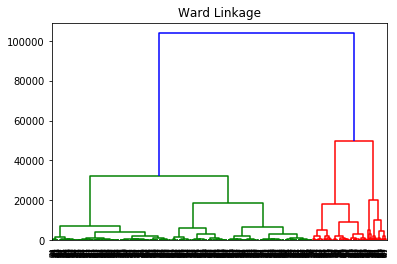

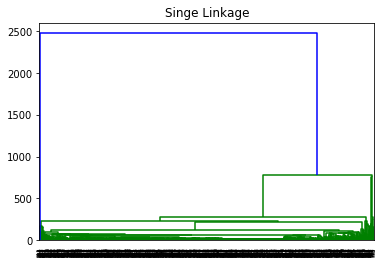

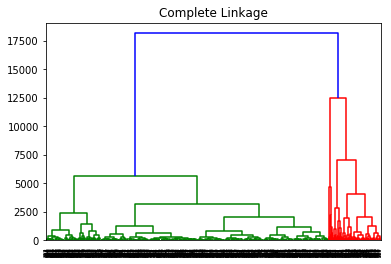

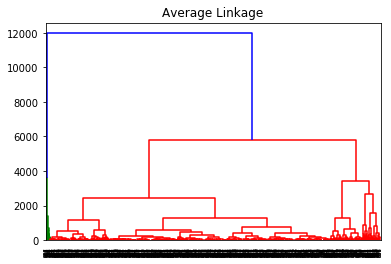

In [369]:
import scipy.cluster.hierarchy as sch

plt.figure()
dendrogram1 = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Ward Linkage")
fig, ax = plt.subplots()
dendrogram2 = sch.dendrogram(sch.linkage(X, method='single'))
plt.title("Singe Linkage")
fig, ax = plt.subplots()
dendrogram3 = sch.dendrogram(sch.linkage(X, method='complete'))
plt.title("Complete Linkage")
fig, ax = plt.subplots()
dendrogram4 = sch.dendrogram(sch.linkage(X, method='average'))
plt.title("Average Linkage")
plt.show()

Based on the linkage, a good hierarchical clustering is better to use ward method linkage with n-cluster = 3

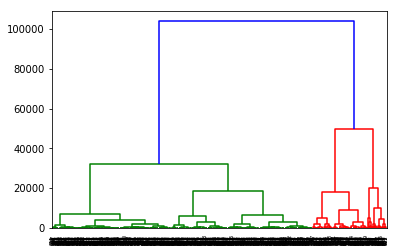

In [370]:
import scipy.cluster.hierarchy as sch
dendrogram2 = sch.dendrogram(sch.linkage(X, method='ward'))

## Fitting

In [371]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labelss = model.labels_
labelss

array([0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 0, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 0, 0,

In [372]:
dataset["ClusterHierarchical"] = labelss
dataset.head()

,ID,Age,Job,Credit amount,Duration,Sex,Housing,Purpose,ClusterKMeans,ClusterHierarchical
0,0,67,2,1169,6,1,1,5,1,0
1,1,22,2,5951,48,0,1,5,0,2
2,2,49,1,2096,12,1,1,3,1,0
3,3,45,2,7882,42,1,0,4,0,2
4,4,53,2,4870,24,1,0,1,0,2


## Clustering Correlation

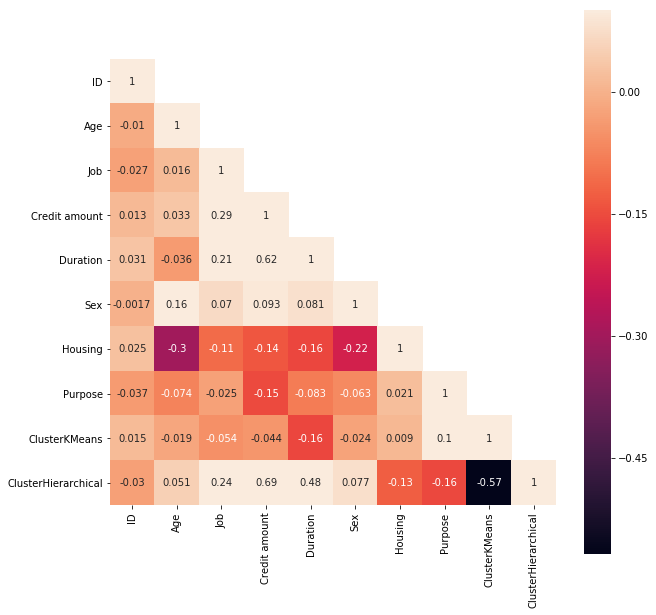

In [373]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
#create correlation with hitmap

#create correlation
corr = dataset.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (5,3))
fig.set_size_inches(10,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.1, 
            square = True, 
            annot = True)

## Clustering Visualization

### Credit Amount and Duration

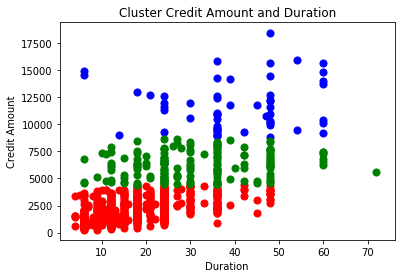

In [375]:
plt.scatter(X[labelss==0, 3], X[labelss==0, 2], s=50, marker='o', color='red')
plt.scatter(X[labelss==1, 3], X[labelss==1, 2], s=50, marker='o', color='blue')
plt.scatter(X[labelss==2, 3], X[labelss==2, 2], s=50, marker='o', color='green')
plt.xlabel("Duration")
plt.ylabel("Credit Amount")
plt.title("Cluster Credit Amount and Duration")
plt.show()

Based on the graph, we can see that 
- **Cluster 0** is the Costumer that have a **low credit amount** and also have the **short duration** which is means that they have a **low or good risk** because they can giving back the credit fastly.
- **Cluster 1** is the Costumer that have a **average credit amount** and also have the **short duration** which is means that they have a **medium risk** because they can giving back the credit fastly but not as fast like Cluster 0.
- **Cluster 2** is the Costumer that have a **high credit amount** and also have the **long duration** which is means that they have a **high risk** because they can giving back the credit slowly.

### Credit Amount and Sex

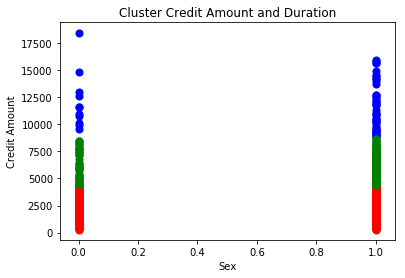

In [376]:
plt.scatter(X[labelss==0, 4], X[labelss==0, 2], s=50, marker='o', color='red')
plt.scatter(X[labelss==1, 4], X[labelss==1, 2], s=50, marker='o', color='blue')
plt.scatter(X[labelss==2, 4], X[labelss==2, 2], s=50, marker='o', color='green')
plt.xlabel("Sex")
plt.ylabel("Credit Amount")
plt.title("Cluster Credit Amount and Duration")
plt.show()

We can see that in the **female and male there was the same amount of Credit in cluster 0 and 1**. <br>

but **female have the higher amount of cluster than female in cluster 2** when we were looking by the highest amount of Credit which the density of male is more crowded than female in cluster 1.

### Credit Amount and Age

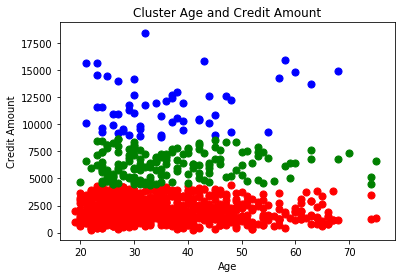

In [377]:
plt.scatter(X[labelss==0, 0], X[labelss==0, 2], s=50, marker='o', color='red')
plt.scatter(X[labelss==1, 0], X[labelss==1, 2], s=50, marker='o', color='blue')
plt.scatter(X[labelss==2, 0], X[labelss==2, 2], s=50, marker='o', color='green')
plt.xlabel("Age")
plt.ylabel("Credit Amount")
plt.title("Cluster Age and Credit Amount")
plt.show()

we can see that **cluster 0 have the highest amount** because the density of the cluster is too crowded than other cluster. But on the age distribution, all cluster is not far away from one cluster to another cluster. But in the age of more than 70 is categorized as cluster 0 and cluster 2 with low and medium credit amount.

### Credit Amount and Housing

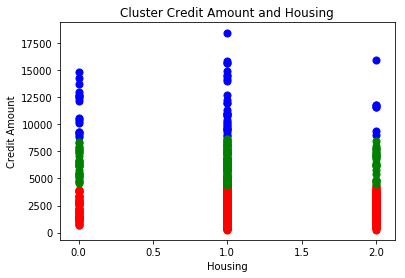

In [378]:
plt.scatter(X[labelss==0, 5], X[labelss==0, 2], s=50, marker='o', color='red')
plt.scatter(X[labelss==1, 5], X[labelss==1, 2], s=50, marker='o', color='blue')
plt.scatter(X[labelss==2, 5], X[labelss==2, 2], s=50, marker='o', color='green')
plt.xlabel("Housing")
plt.ylabel("Credit Amount")
plt.title("Cluster Credit Amount and Housing")
plt.show()

### Credit Amount and Purpose

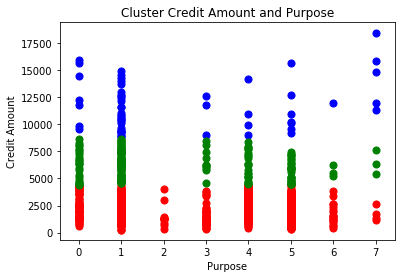

In [380]:
plt.scatter(X[labelss==0, 6], X[labelss==0, 2], s=50, marker='o', color='red')
plt.scatter(X[labelss==1, 6], X[labelss==1, 2], s=50, marker='o', color='blue')
plt.scatter(X[labelss==2, 6], X[labelss==2, 2], s=50, marker='o', color='green')
plt.xlabel("Purpose")
plt.ylabel("Credit Amount")
plt.title("Cluster Credit Amount and Purpose")
plt.show()

Based on the graph, we can see that **in the cluster 0 and Cluster 1, Domestic Appliance, Repairs and Vacation purpose is the lowest amount of Credit**.

While in the cluster 2, **domestic appliance purpose have the higher amount than other purpose based on Highest Credit Amount.**

## Clustering Analysis

In [381]:
H=dataset.ClusterHierarchical.value_counts()
H

0    779
2    165
1     56
Name: ClusterHierarchical, dtype: int64

**Cluster 0 as lower Risk** has the highest value which there was 779 costumer that include
- **Credit Amount** : Low (0-4000)
- **Duration Credit** : between 0-50
- **Age** : between 0-70 but not too much in age betweet 0-50.
- **Credit Purpose** : Business, Car, Furniture Equipment.
- Have the Same Proportion on **Housing Type and Gender**
<br>
<br>

**Cluster 1 as medium Risk** has the medium value which there was 165 costumer that include :
- **Credit Amount** : Medium (4000-8500)
- **Duration Credit** : between 0-50, but sometimes can more than 70
- **Age** : between 0-70 but too much in age between 0-50.
- **Purpose**: Business, Car, Furniture Equipment.
- Have the Same Proportion on **Housing Type and Gender**
<br>
<br>

**Cluster 2 as High Risk** has the lowest value which there was only 56 costumer that include :
- **Credit Amount** : High (More than 8500)
- **Duration Credit** : between 0-60, too much is 37, 49, 60.
- **Age** : between 0-50 but sometimes more than age between 0-50.
- **Purpose**: Car.
- **Housing Type**: Own Housing
- **Gender** : Female


# DBSCAN

### Choosing Amount of Epsilon

In [383]:
dataset.describe()

,ID,Age,Job,Credit amount,Duration,Sex,Housing,Purpose,ClusterKMeans,ClusterHierarchical
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000,0.690000,1.071000,2.878000,0.840000,0.386000
std,288.819436,11.375469,0.653614,2822.736876,12.058814,0.462725,0.531264,1.978138,0.496635,0.753373
min,0.000000,19.000000,0.000000,250.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000,1.000000,1.000000,3.000000,1.000000,0.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000,1.000000,1.000000,5.000000,1.000000,0.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000,1.000000,2.000000,7.000000,2.000000,2.000000


Based on the credit amount, we know that epsilon can be defined by the lowest Credit Amount because credit amount has the highest correlation with cluster. So the epsilon is 2500.

## Clustering Models

In [382]:
from sklearn.cluster import DBSCAN
epsilon = 250
minimumSamples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labelsss = dbscan.labels_
labelsss

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [384]:
dataset["ClusterDBSCAN"] = labelsss
dataset.head()

,ID,Age,Job,Credit amount,Duration,Sex,Housing,Purpose,ClusterKMeans,ClusterHierarchical,ClusterDBSCAN
0,0,67,2,1169,6,1,1,5,1,0,0
1,1,22,2,5951,48,0,1,5,0,2,0
2,2,49,1,2096,12,1,1,3,1,0,0
3,3,45,2,7882,42,1,0,4,0,2,0
4,4,53,2,4870,24,1,0,1,0,2,0


##Clustering Visualization

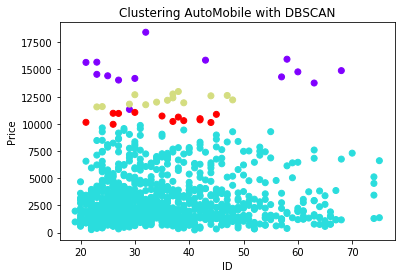

In [385]:
plt.scatter(X[:,0],X[:,2], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("ID")
plt.ylabel("Price")
plt.title("Clustering AutoMobile with DBSCAN")
plt.show()

In [386]:
D=dataset.ClusterDBSCAN.value_counts()
D

 0    959
-1     14
 1     14
 2     13
Name: ClusterDBSCAN, dtype: int64

The different of  -1,1,2  cluster amount is too far away from cluster 0 that means this algorithm can be taken because too much outlier in the clustering method.

## Clustering Analysis

# Conclusion

### 1. Best Algorithm

I think K-Means is the best algorithm because 
- It can make a certain n-cluster
- It have a little density for every cluster
- It easy to understand by the visualization

### 2. Customer Segment Based K-Means

There was 3 segment of costumer because the n-cluster is 3

**Low Risk Customer**
- Credit Amount : Low (0-4000)
- Duration Credit : between 0-50
- Age : between 0-70 but not too much in age betweet 0-50.
- Credit Purpose : Business, Car, Furniture Equipment.

**Medium Risk Customer**

- Credit Amount : Medium (4000-8500)
- Duration Credit : between 0-50, but sometimes can more than 70
- Age : between 0-70 but too much in age between 0-50.
- Purpose: Business, Car, Furniture Equipment.


**High Risk Customer**

Credit Amount : High (More than 8500)
Duration Credit : between 0-60, too much is 37, 49, 60.
Age : between 0-50 but sometimes more than age between 0-50.
Purpose: Car.
Housing Type: Own Housing
Gender : Female

## 3. Benefits For Client/Department
 This Clustering Data Can help client and department to get the benefit in business like :


### Operational Department

Operational Department can get the benefit with knowing who is costumer who can get the credit by this Condition
<br>
<br>

Give **a possible Credit** for Customer who have a low risk and medium risk with the criteria :
1.  **Credit Amount** in 0-8500
2.  **Duration Credit** in 0-70
3.  **Age** between 0-50
4. **Credit** Purpose for Business, Car, and Furniture Equipment
5. **Gender and Housing Type** it doesnt matter.

**Minimize The Credit** For Costumer who have a high risk with criteria :
- **Credit Amount** : More than 8500
- **Duration Credit** : age in 37, 49, 60.
- **Age** : between 50-70 
- **Purpose**: Car.
- **Housing Type**: Own Housing
- **Gender** : Female

### Marketing Department

- Make a promo when there was a customer with Credit Purpose for Business, Car and Furniture Equipment beaucse it purpose have a low risk
- Make a reward for costumer who have a credit amount in 0-8500 and giving back the credit on time
- Make a discount for customer who have a duration promo in 0-35 in age between 25-50

Notes (Age 0-35 is a half age in 70 that is in the low risk costumer segment and 25-50 is a productive age to work that is possible to pay the credit)

### Client Benefit

Can get a promo and reward for Marketing Department if they are include in costumer with low risk segment.